In [92]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import shap

In [93]:
from sklearn.datasets import load_breast_cancer
breast_cancer_dataset = load_breast_cancer()

features = breast_cancer_dataset['feature_names']
data = pd.DataFrame(breast_cancer_dataset['data'], columns=features)
data['target'] = breast_cancer_dataset['target']

data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [94]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
train, test = train_test_split(data, test_size=.3)

In [132]:
clf = DecisionTreeClassifier(max_depth=2)
clf.fit(train[features], train['target'])

print("Training results  -----------------")
print(classification_report(train['target'], clf.predict(train[features])))
print("\nTesting results  -----------------")
print(classification_report(test['target'], clf.predict(test[features])))

Training results  -----------------
              precision    recall  f1-score   support

           0       0.97      0.94      0.96       147
           1       0.96      0.98      0.97       251

    accuracy                           0.97       398
   macro avg       0.97      0.96      0.96       398
weighted avg       0.97      0.97      0.97       398


Testing results  -----------------
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        65
           1       0.95      0.92      0.94       106

    accuracy                           0.92       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.92      0.92       171



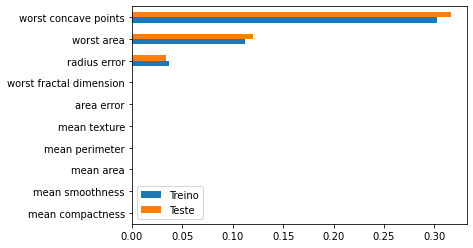

In [133]:
exp = shap.Explainer(clf)
shap_values_train = exp(train[features])[:,:,1]
shap_values_test = exp(test[features])[:,:,1]

shap_df_train = pd.DataFrame(shap_values_train.values, columns=features)
shap_df_test = pd.DataFrame(shap_values_test.values, columns=features)

full_shap = pd.concat((shap_df_train.abs().mean(), 
                       shap_df_test.abs().mean()), axis=1)
full_shap.columns=['Treino', 'Teste']
full_shap.sort_values('Teste').tail(10).plot.barh();

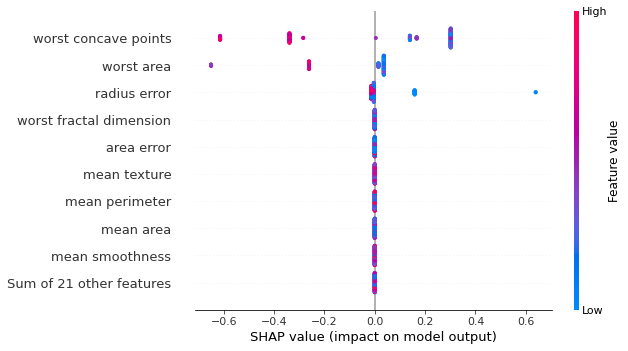

In [134]:
shap.plots.beeswarm(shap_values_test)

In [135]:
shap_df_test # They are really 0

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.261127,0.0,0.0,0.0,-0.338920,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-0.650373,0.0,0.0,0.0,0.166286,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.035989,0.0,0.0,0.0,0.301495,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.035989,0.0,0.0,0.0,0.139493,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.035989,0.0,0.0,0.0,0.139493,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.014450,0.0,0.0,0.0,-0.614497,0.0,0.0
167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.035989,0.0,0.0,0.0,0.301495,0.0,0.0
168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.035989,0.0,0.0,0.0,0.301495,0.0,0.0
169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.035989,0.0,0.0,0.0,0.301495,0.0,0.0


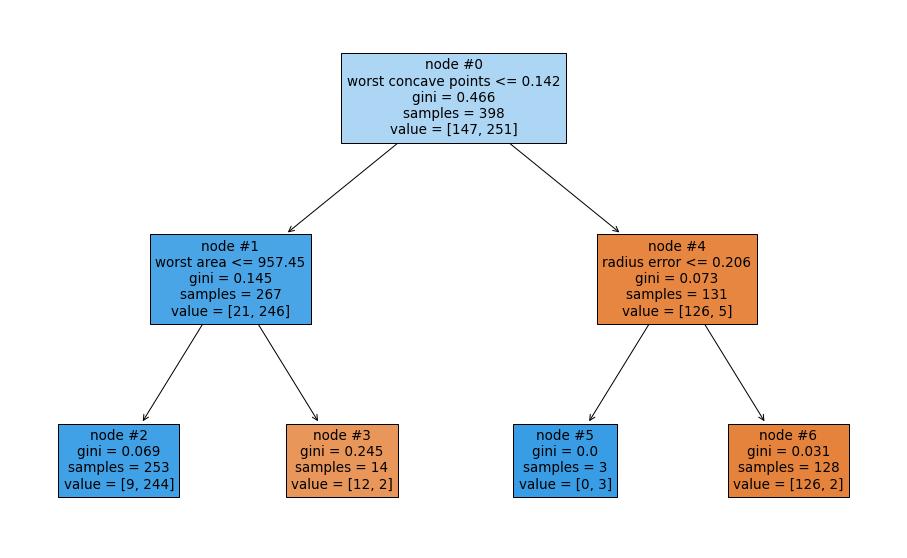

In [136]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,10))
plot_tree(clf,
        feature_names = features, 
        filled = True,
        node_ids=True);


In [137]:
relevant_feats = ['worst concave points', 'worst area', 'radius error']

In [138]:
test['nodes'] = clf.apply(test[features].values.astype('float32'))
test


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target,nodes
57,14.710,21.59,95.55,656.9,0.11370,0.13650,0.12930,0.08123,0.2027,0.06758,...,115.70,985.5,0.13680,0.42900,0.35870,0.18340,0.3698,0.10940,0,6
213,17.420,25.56,114.50,948.0,0.10060,0.11460,0.16820,0.06597,0.1308,0.05866,...,120.40,1021.0,0.12430,0.17930,0.28030,0.10990,0.1603,0.06818,0,3
228,12.620,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.02036,0.1514,0.06019,...,90.67,624.0,0.12270,0.34540,0.39110,0.11800,0.2826,0.09585,1,2
294,12.720,13.78,81.78,492.1,0.09667,0.08393,0.01288,0.01924,0.1638,0.06100,...,88.54,553.7,0.12980,0.14720,0.05233,0.06343,0.2369,0.06922,1,2
120,11.410,10.82,73.34,403.3,0.09373,0.06685,0.03512,0.02623,0.1667,0.06113,...,83.74,510.5,0.15480,0.23900,0.21020,0.08958,0.3016,0.08523,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,9.731,15.34,63.78,300.2,0.10720,0.15990,0.41080,0.07857,0.2548,0.09296,...,71.04,380.5,0.12920,0.27720,0.82160,0.15710,0.3108,0.12590,1,6
553,9.333,21.94,59.01,264.0,0.09240,0.05605,0.03996,0.01282,0.1692,0.06576,...,62.86,295.8,0.11030,0.08298,0.07993,0.02564,0.2435,0.07393,1,2
217,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,...,75.40,403.7,0.09527,0.13970,0.19250,0.03571,0.2868,0.07809,1,2
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.11120,0.04105,0.1388,0.06570,...,82.28,474.2,0.12980,0.25170,0.36300,0.09653,0.2112,0.08732,1,2


In [141]:
shap_df_test[(test['nodes']==3).values][relevant_feats]

,worst concave points,worst area,radius error
1,0.166286,-0.650373,-0.003710
13,0.166286,-0.650373,-0.003710
15,0.166286,-0.650373,-0.003710
41,0.166286,-0.650373,-0.003710
60,0.166286,-0.650373,-0.003710
121,0.166286,-0.650373,-0.003710
136,0.166286,-0.650373,-0.003710
144,0.166286,-0.650373,-0.003710
161,0.004285,-0.650373,0.158291


In [152]:
shap_df_test[(test['nodes']==3).values][relevant_feats]

,worst concave points,worst area,radius error
1,0.166286,-0.650373,-0.003710
13,0.166286,-0.650373,-0.003710
15,0.166286,-0.650373,-0.003710
41,0.166286,-0.650373,-0.003710
60,0.166286,-0.650373,-0.003710
121,0.166286,-0.650373,-0.003710
136,0.166286,-0.650373,-0.003710
144,0.166286,-0.650373,-0.003710
161,0.004285,-0.650373,0.158291


In [153]:
test[(test['nodes']==3).values][relevant_feats]

,worst concave points,worst area,radius error
213,0.10990,1021.0,0.5296
197,0.09181,1228.0,0.6362
263,0.08568,988.6,0.2298
363,0.09123,1009.0,0.3389
329,0.10470,975.2,0.5706
171,0.11600,993.6,0.4697
127,0.12180,1538.0,0.6896
141,0.12160,1233.0,0.7049
184,0.12260,973.1,0.2054


In [ ]:
# Talvez aqui caiba um desenhno no iPad sobre a arvore
# E comparação com a ideia da média na regressão linear